In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split


## Financial Risk for Loan Approval

In [83]:
raw_data = pd.read_csv('loan_data_V1.csv')
raw_data

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,...,3329.00,0.72,11,126928,0.20,0.23,419.81,0.18,0,49.00
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,...,3309.08,0.94,3,43609,0.21,0.20,794.05,0.39,0,52.00
2,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,...,3393.67,0.87,6,5205,0.22,0.21,666.41,0.46,0,52.00
3,2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,...,5757.00,0.90,5,99452,0.30,0.30,1047.51,0.31,0,54.00
4,2018-01-05,37,103264,594,Employed,Associate,17,9184,36,Married,...,8605.33,0.94,5,227019,0.20,0.18,330.18,0.07,1,36.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2072-09-29,44,30180,587,Employed,High School,19,24521,36,Married,...,2515.00,0.83,1,55327,0.22,0.20,905.77,0.63,0,55.00
19996,2072-09-30,56,49246,567,Employed,Associate,33,25818,36,Married,...,4103.83,0.82,3,64002,0.23,0.20,958.40,0.33,0,54.00
19997,2072-10-01,44,48958,645,Employed,Bachelor,20,37033,72,Married,...,4079.83,0.89,3,103663,0.23,0.23,945.43,0.36,0,45.00
19998,2072-10-02,60,41025,560,Employed,High School,36,14760,72,Married,...,3418.75,0.84,5,10600,0.25,0.26,411.17,0.41,0,59.00


In [85]:
raw_data['LoanApproved'].value_counts()

LoanApproved
0    15220
1     4780
Name: count, dtype: int64

In [89]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             20000 non-null  object 
 1   Age                         20000 non-null  int64  
 2   AnnualIncome                20000 non-null  int64  
 3   CreditScore                 20000 non-null  int64  
 4   EmploymentStatus            20000 non-null  object 
 5   EducationLevel              20000 non-null  object 
 6   Experience                  20000 non-null  int64  
 7   LoanAmount                  20000 non-null  int64  
 8   LoanDuration                20000 non-null  int64  
 9   MaritalStatus               20000 non-null  object 
 10  NumberOfDependents          20000 non-null  int64  
 11  HomeOwnershipStatus         20000 non-null  object 
 12  MonthlyDebtPayments         20000 non-null  int64  
 13  CreditCardUtilizationRate   200

## Split into Numeric and Categorical Datasets

In [91]:
baseline_df_numeric = raw_data.select_dtypes(include=[np.number])
baseline_df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         20000 non-null  int64  
 1   AnnualIncome                20000 non-null  int64  
 2   CreditScore                 20000 non-null  int64  
 3   Experience                  20000 non-null  int64  
 4   LoanAmount                  20000 non-null  int64  
 5   LoanDuration                20000 non-null  int64  
 6   NumberOfDependents          20000 non-null  int64  
 7   MonthlyDebtPayments         20000 non-null  int64  
 8   CreditCardUtilizationRate   20000 non-null  float64
 9   NumberOfOpenCreditLines     20000 non-null  int64  
 10  NumberOfCreditInquiries     20000 non-null  int64  
 11  DebtToIncomeRatio           20000 non-null  float64
 12  BankruptcyHistory           20000 non-null  int64  
 13  PreviousLoanDefaults        200

In [93]:
baseline_df_categorical = raw_data.select_dtypes(include=[object])
baseline_df_categorical

,ApplicationDate,EmploymentStatus,EducationLevel,MaritalStatus,HomeOwnershipStatus,LoanPurpose
0,2018-01-01,Employed,Master,Married,Own,Home
1,2018-01-02,Employed,Associate,Single,Mortgage,Debt Consolidation
2,2018-01-03,Employed,Bachelor,Married,Rent,Education
3,2018-01-04,Employed,High School,Single,Mortgage,Home
4,2018-01-05,Employed,Associate,Married,Mortgage,Debt Consolidation
...,...,...,...,...,...,...
19995,2072-09-29,Employed,High School,Married,Rent,Auto
19996,2072-09-30,Employed,Associate,Married,Rent,Debt Consolidation
19997,2072-10-01,Employed,Bachelor,Married,Mortgage,Home
19998,2072-10-02,Employed,High School,Married,Own,Debt Consolidation


## One Hot Encoding for Categorical Data

In [95]:
one_hot_cols = ['EmploymentStatus','EducationLevel','MaritalStatus','HomeOwnershipStatus','LoanPurpose']
one_hot_cols

['EmploymentStatus',
 'EducationLevel',
 'MaritalStatus',
 'HomeOwnershipStatus',
 'LoanPurpose']

In [97]:
baseline_df_categorical_encoded = pd.get_dummies(baseline_df_categorical, columns=one_hot_cols, drop_first=True)
baseline_df_categorical_encoded

,ApplicationDate,EmploymentStatus_Self-Employed,EmploymentStatus_Unemployed,EducationLevel_Bachelor,EducationLevel_Doctorate,EducationLevel_High School,EducationLevel_Master,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Widowed,HomeOwnershipStatus_Other,HomeOwnershipStatus_Own,HomeOwnershipStatus_Rent,LoanPurpose_Debt Consolidation,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other
0,2018-01-01,False,False,False,False,False,True,True,False,False,False,True,False,False,False,True,False
1,2018-01-02,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False
2,2018-01-03,False,False,True,False,False,False,True,False,False,False,False,True,False,True,False,False
3,2018-01-04,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False
4,2018-01-05,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2072-09-29,False,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False
19996,2072-09-30,False,False,False,False,False,False,True,False,False,False,False,True,True,False,False,False
19997,2072-10-01,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False
19998,2072-10-02,False,False,False,False,True,False,True,False,False,False,True,False,True,False,False,False


In [115]:
baseline_df_categorical_encoded = baseline_df_categorical_encoded.drop(columns='ApplicationDate')
baseline_df_categorical_encoded

,EmploymentStatus_Self-Employed,EmploymentStatus_Unemployed,EducationLevel_Bachelor,EducationLevel_Doctorate,EducationLevel_High School,EducationLevel_Master,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Widowed,HomeOwnershipStatus_Other,HomeOwnershipStatus_Own,HomeOwnershipStatus_Rent,LoanPurpose_Debt Consolidation,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other
0,False,False,False,False,False,True,True,False,False,False,True,False,False,False,True,False
1,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False
2,False,False,True,False,False,False,True,False,False,False,False,True,False,True,False,False
3,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,False,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False
19996,False,False,False,False,False,False,True,False,False,False,False,True,True,False,False,False
19997,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False
19998,False,False,False,False,True,False,True,False,False,False,True,False,True,False,False,False


## Join Dataset Before Train Test Split and Sampling

In [120]:
model_df_baseline = baseline_df_categorical_encoded
baseline_df_numeric_columns = baseline_df_numeric.columns
model_df_baseline[baseline_df_numeric_columns] = baseline_df_numeric
model_df_baseline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 46 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   EmploymentStatus_Self-Employed  20000 non-null  bool   
 1   EmploymentStatus_Unemployed     20000 non-null  bool   
 2   EducationLevel_Bachelor         20000 non-null  bool   
 3   EducationLevel_Doctorate        20000 non-null  bool   
 4   EducationLevel_High School      20000 non-null  bool   
 5   EducationLevel_Master           20000 non-null  bool   
 6   MaritalStatus_Married           20000 non-null  bool   
 7   MaritalStatus_Single            20000 non-null  bool   
 8   MaritalStatus_Widowed           20000 non-null  bool   
 9   HomeOwnershipStatus_Other       20000 non-null  bool   
 10  HomeOwnershipStatus_Own         20000 non-null  bool   
 11  HomeOwnershipStatus_Rent        20000 non-null  bool   
 12  LoanPurpose_Debt Consolidation  

## Oversampling Minority Class with SMOTE, Random Undersampling for Majority Class

In [58]:
def smote_oversampling():
    return None

In [60]:
def random_undersampling():
    return None

## Split into Training Features and Target Labels

In [123]:
X = model_df_baseline.drop(columns=['LoanApproved'])
X

,EmploymentStatus_Self-Employed,EmploymentStatus_Unemployed,EducationLevel_Bachelor,EducationLevel_Doctorate,EducationLevel_High School,EducationLevel_Master,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Widowed,HomeOwnershipStatus_Other,...,TotalLiabilities,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,RiskScore
0,False,False,False,False,False,True,True,False,False,False,...,19183,3329.00,0.72,11,126928,0.20,0.23,419.81,0.18,49.00
1,False,False,False,False,False,False,False,True,False,False,...,9595,3309.08,0.94,3,43609,0.21,0.20,794.05,0.39,52.00
2,False,False,True,False,False,False,True,False,False,False,...,128874,3393.67,0.87,6,5205,0.22,0.21,666.41,0.46,52.00
3,False,False,False,False,True,False,False,True,False,False,...,5370,5757.00,0.90,5,99452,0.30,0.30,1047.51,0.31,54.00
4,False,False,False,False,False,False,True,False,False,False,...,17286,8605.33,0.94,5,227019,0.20,0.18,330.18,0.07,36.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,False,False,False,False,True,False,True,False,False,False,...,25642,2515.00,0.83,1,55327,0.22,0.20,905.77,0.63,55.00
19996,False,False,False,False,False,False,True,False,False,False,...,5569,4103.83,0.82,3,64002,0.23,0.20,958.40,0.33,54.00
19997,False,False,True,False,False,False,True,False,False,False,...,4653,4079.83,0.89,3,103663,0.23,0.23,945.43,0.36,45.00
19998,False,False,False,False,True,False,True,False,False,False,...,11485,3418.75,0.84,5,10600,0.25,0.26,411.17,0.41,59.00


In [125]:
y = pd.DataFrame(model_df_baseline['LoanApproved'])
y

,LoanApproved
0,0
1,0
2,0
3,0
4,1
...,...
19995,0
19996,0
19997,0
19998,0


## Train Test Split

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train, X_test, y_train, y_test

(       EmploymentStatus_Self-Employed  EmploymentStatus_Unemployed  \
 5894                            False                        False   
 3728                            False                        False   
 8958                            False                        False   
 7671                            False                         True   
 5999                            False                        False   
 ...                               ...                          ...   
 11284                           False                        False   
 11964                           False                        False   
 5390                            False                        False   
 860                             False                        False   
 15795                           False                        False   
 
        EducationLevel_Bachelor  EducationLevel_Doctorate  \
 5894                     False                     False   
 3728                   

## Standardization

In [127]:
from sklearn.preprocessing import StandardScaler

In [144]:
def standardization(X_train, X_test):
    scaler = StandardScaler()

    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    return pd.DataFrame(X_train_scaled, columns=X_train.columns), pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [146]:
def normalization():
    return None

In [148]:
X_train_scaled, X_test_scaled = standardization(X_train, X_test)
X_train_scaled, X_test_scaled

(       EmploymentStatus_Self-Employed  EmploymentStatus_Unemployed  \
 0                               -0.29                        -0.27   
 1                               -0.29                        -0.27   
 2                               -0.29                        -0.27   
 3                               -0.29                         3.64   
 4                               -0.29                        -0.27   
 ...                               ...                          ...   
 15995                           -0.29                        -0.27   
 15996                           -0.29                        -0.27   
 15997                           -0.29                        -0.27   
 15998                           -0.29                        -0.27   
 15999                           -0.29                        -0.27   
 
        EducationLevel_Bachelor  EducationLevel_Doctorate  \
 0                        -0.66                     -0.22   
 1                      

## Lazy Predict for Model Exploration

In [16]:
!pip install lazypredict

In [17]:
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose=1, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

  0%|          | 0/31 [00:00<?, ?it/s]

{'Model': 'AdaBoostClassifier', 'Accuracy': 0.99975, 'Balanced Accuracy': 0.9995083579154376, 'ROC AUC': 0.9995083579154376, 'F1 Score': 0.9997499594630608, 'Time taken': 2.5953879356384277}
{'Model': 'BaggingClassifier', 'Accuracy': 0.992, 'Balanced Accuracy': 0.9875077092049968, 'ROC AUC': 0.9875077092049968, 'F1 Score': 0.9919842905688812, 'Time taken': 2.516774892807007}
{'Model': 'BernoulliNB', 'Accuracy': 0.90975, 'Balanced Accuracy': 0.8944508886970446, 'ROC AUC': 0.8944508886970447, 'F1 Score': 0.9108825461721649, 'Time taken': 0.16014480590820312}
{'Model': 'CalibratedClassifierCV', 'Accuracy': 0.999, 'Balanced Accuracy': 0.9983574572528497, 'ROC AUC': 0.9983574572528497, 'F1 Score': 0.9989996754343375, 'Time taken': 0.4207649230957031}
{'Model': 'DecisionTreeClassifier', 'Accuracy': 0.98875, 'Balanced Accuracy': 0.9843566180166798, 'ROC AUC': 0.98435661801668, 'F1 Score': 0.988740848758155, 'Time taken': 0.5185129642486572}
{'Model': 'DummyClassifier', 'Accuracy': 0.74575, 'B

In [18]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
AdaBoostClassifier,1.00,1.00,1.00,1.00,2.60
LGBMClassifier,1.00,1.00,1.00,1.00,0.30
LogisticRegression,1.00,1.00,1.00,1.00,0.05
XGBClassifier,1.00,1.00,1.00,1.00,0.15
CalibratedClassifierCV,1.00,1.00,1.00,1.00,0.42
LinearSVC,1.00,1.00,1.00,1.00,0.07
PassiveAggressiveClassifier,1.00,1.00,1.00,1.00,0.05
SVC,1.00,1.00,1.00,1.00,1.18
SGDClassifier,1.00,1.00,1.00,1.00,0.06


## Model Selection

In [155]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import xgboost as xgb


knn_baseline = KNeighborsClassifier()
rf_baseline = RandomForestClassifier()
nb_baseline = GaussianNB()
svm_baseline = SVC()
xgb_baseline = xgb.XGBClassifier()

model_library = [
    ('KNN', KNeighborsClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Naive Bayes', GaussianNB()),
    ('SVM', SVC(probability=True)),
    ('XGBoost', xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'))
]

## Model Training

### Baseline Training

In [202]:
from sklearn.metrics import (
    accuracy_score, roc_auc_score, precision_score,
    recall_score, classification_report
)
from sklearn.preprocessing import label_binarize

def train_models(models, X_train, y_train, X_test, y_test):
    results = {}
    classes = np.unique(y_train)
    is_multiclass = len(classes) > 2
    y_test_binarized = label_binarize(y_test, classes=classes) if is_multiclass else y_test

    for name, model in models:
        print(f"\nTraining {name}...")
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Accuracy
        acc = accuracy_score(y_test, y_pred)

        # Precision & Recall
        precision = precision_score(y_test, y_pred, average='weighted' if is_multiclass else 'binary', zero_division=0)
        recall = recall_score(y_test, y_pred, average='weighted' if is_multiclass else 'binary', zero_division=0)

        # Classification Report
        report = classification_report(y_test, y_pred, zero_division=0)

        # ROC AUC
        try:
            if hasattr(model, "predict_proba"):
                y_scores = model.predict_proba(X_test)
            elif hasattr(model, "decision_function"):
                y_scores = model.decision_function(X_test)
            else:
                y_scores = None

            if y_scores is not None:
                if is_multiclass:
                    roc_auc = roc_auc_score(y_test_binarized, y_scores, multi_class='ovr')
                else:
                    roc_auc = roc_auc_score(y_test, y_scores[:, 1])
            else:
                roc_auc = None
        except Exception as e:
            print(f"ROC AUC error for {name}: {e}")
            roc_auc = None

        # Print metrics
        print(f"{name} Accuracy:      {acc:.4f}")
        print(f"{name} Precision:     {precision:.4f}")
        print(f"{name} Recall:        {recall:.4f}")
        print(f"{name} ROC AUC:       {roc_auc:.4f}" if roc_auc is not None else f"{name} ROC AUC:       N/A")
        print(f"{name} Classification Report:\n{report}")

        # Store results
        results[name] = {
            'model': model,
            'accuracy': acc,
            'precision': precision,
            'recall': recall,
            'roc_auc': roc_auc,
            'classification_report': report,
            'y_pred': y_pred,
            'y_scores': y_scores  # <<--- ADD THIS LINE
        }


    return results

In [204]:
baseline_model_results = train_models(model_library, X_train, y_train, X_test, y_test)
baseline_model_results


Training KNN...
KNN Accuracy:      0.8550
KNN Precision:     0.7458
KNN Recall:        0.6519
KNN ROC AUC:       0.8867
KNN Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.92      0.90      2983
           1       0.75      0.65      0.70      1017

    accuracy                           0.85      4000
   macro avg       0.82      0.79      0.80      4000
weighted avg       0.85      0.85      0.85      4000


Training Random Forest...
Random Forest Accuracy:      0.9915
Random Forest Precision:     0.9871
Random Forest Recall:        0.9794
Random Forest ROC AUC:       0.9994
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2983
           1       0.99      0.98      0.98      1017

    accuracy                           0.99      4000
   macro avg       0.99      0.99      0.99      4000
weighted avg       0.99      0.99      0.99  

{'KNN': {'model': KNeighborsClassifier(),
  'accuracy': 0.855,
  'precision': 0.7457817772778402,
  'recall': 0.6519174041297935,
  'roc_auc': 0.886722730016142,
  'classification_report': '              precision    recall  f1-score   support\n\n           0       0.89      0.92      0.90      2983\n           1       0.75      0.65      0.70      1017\n\n    accuracy                           0.85      4000\n   macro avg       0.82      0.79      0.80      4000\nweighted avg       0.85      0.85      0.85      4000\n',
  'y_pred': array([0, 1, 0, ..., 0, 0, 0]),
  'y_scores': array([[0.8, 0.2],
         [0. , 1. ],
         [0.8, 0.2],
         ...,
         [1. , 0. ],
         [1. , 0. ],
         [1. , 0. ]])},
 'Random Forest': {'model': RandomForestClassifier(),
  'accuracy': 0.9915,
  'precision': 0.9871159563924677,
  'recall': 0.9793510324483776,
  'roc_auc': 0.9993852413759913,
  'classification_report': '              precision    recall  f1-score   support\n\n           0 

### Cross Validation

In [206]:
def cross_validation():
    return None

### Hyperparameter Tuning

In [208]:
def grid_search():
    return None

## Model Performance

In [210]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, auc

def visualize_model_performance(results, X_test, y_test):
    models = list(results.keys())

    plt.figure(figsize=(10, 6))
    for name in models:
        model_info = results[name]
        y_scores = model_info['y_scores']

        if y_scores is None:
            print(f"Skipping ROC curve for {name} (no probability scores).")
            continue

        # Handle multiclass skipping (unless you want me to extend this)
        if len(np.unique(y_test)) > 2:
            print(f"Skipping ROC curve for {name} (multiclass ROC curve not implemented).")
            continue

        if y_scores.ndim > 1:
            y_scores = y_scores[:, 1]

        fpr, tpr, _ = roc_curve(y_test, y_scores)
        model_auc = auc(fpr, tpr)

        plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {model_auc:.2f})')

    # Plot baseline
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves for Trained Models')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Now bar chart of performance metrics
    accuracies = [results[m]['accuracy'] for m in models]
    precisions = [results[m]['precision'] for m in models]
    recalls = [results[m]['recall'] for m in models]
    aucs = [results[m]['roc_auc'] if results[m]['roc_auc'] is not None else 0 for m in models]

    x = np.arange(len(models))
    width = 0.2

    plt.figure(figsize=(12, 6))
    plt.bar(x - 1.5*width, accuracies, width, label='Accuracy')
    plt.bar(x - 0.5*width, precisions, width, label='Precision')
    plt.bar(x + 0.5*width, recalls, width, label='Recall')
    plt.bar(x + 1.5*width, aucs, width, label='ROC AUC')

    plt.xticks(x, models, rotation=45)
    plt.ylim(0, 1)
    plt.ylabel('Score')
    plt.title('Model Performance Metrics')
    plt.legend()
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()


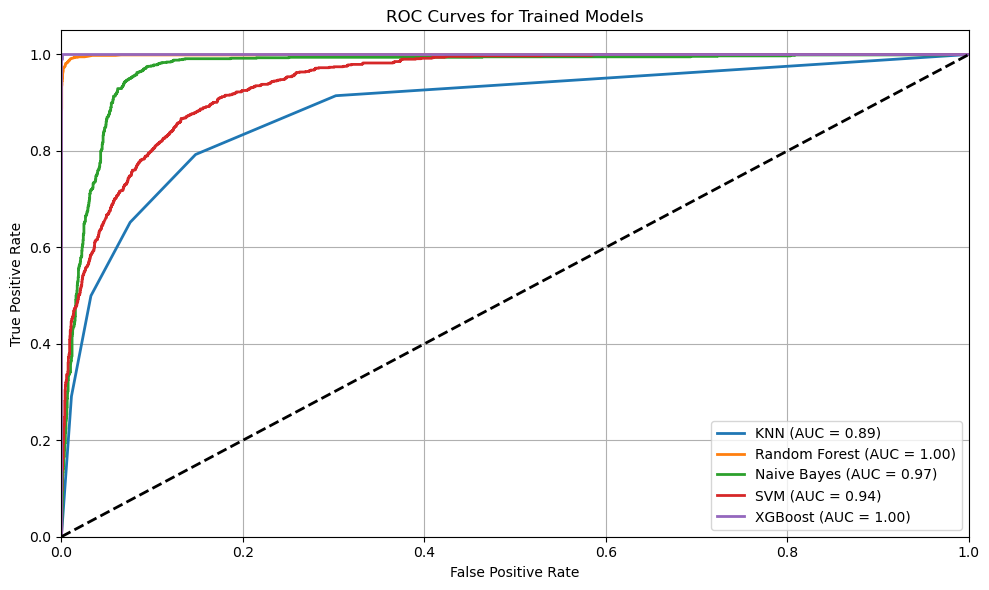

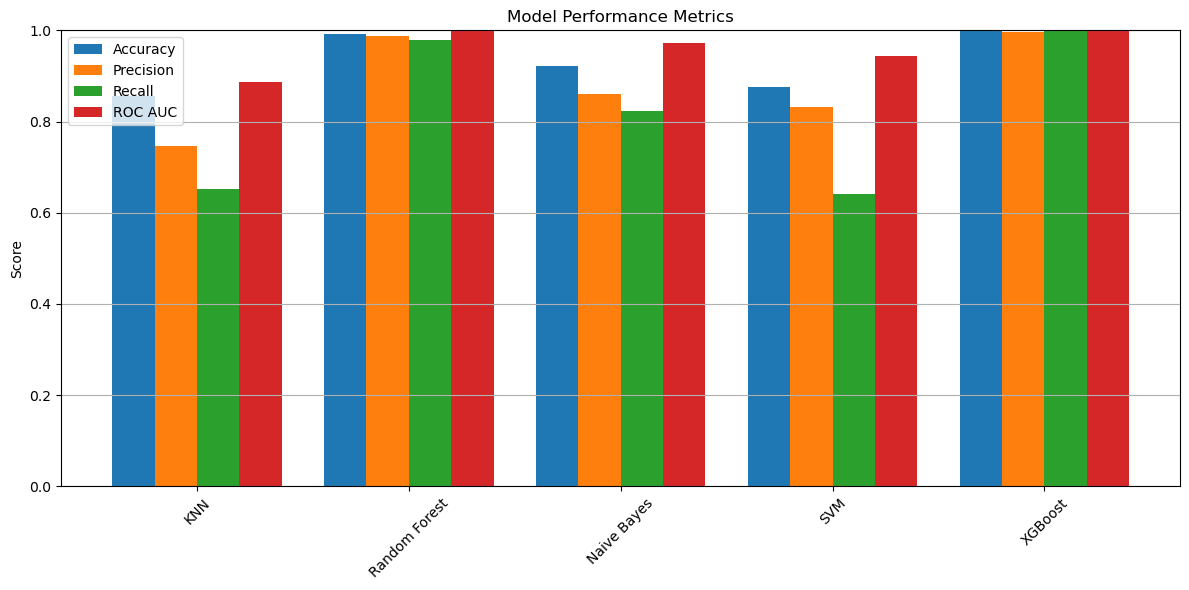

In [211]:
visualize_model_performance(baseline_model_results, X_test_scaled, y_test)

## Explainability with SHAP Values

In [19]:
import xgboost as xgb
import lightgbm as lgbm
from sklearn import svm
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression, Perceptron

from sklearn.metrics import accuracy_score, confusion_matrix

In [20]:
xgb_clf = xgb.XGBClassifier()
ab_clf = AdaBoostClassifier()
lgbm_clf = lgbm.LGBMClassifier()
lr_clf = LogisticRegression()
svm_clf = svm.SVC()
perceptron_clf = Perceptron()
rf_clf = RandomForestClassifier()

In [21]:
!pip install shap

import shap

In [23]:
def compute_shap_values(models: dict, X: pd.DataFrame, y: pd.Series):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    for name, model in models.items():
        print(f"\nExplaining: {name}")

        # Fit the model
        model.fit(X_train, y_train)

        try:
            if isinstance(model, (xgb.XGBClassifier, lgbm.LGBMClassifier, RandomForestClassifier)):
                explainer = shap.TreeExplainer(model)
            elif isinstance(model, (AdaBoostClassifier, LogisticRegression, svm.SVC, Perceptron)):
                background = shap.kmeans(X_train, 10)
                explainer = shap.KernelExplainer(model.predict_proba, background)
            else:
                print(f"Skipping {name}: no compatible SHAP explainer.")
                continue

            shap_values = explainer.shap_values(X_test)

            if isinstance(shap_values, list):
                shap_values = shap_values[1 if len(shap_values) > 1 else 0]

            shap.summary_plot(shap_values, X_test, show=True)

        except Exception as e:
            print(f"Failed to explain {name}: {e}")


In [25]:
shap_values, explainer = compute_shap_values(model, X)
shap.plots.beeswarm(shap_values)

NameError: name 'model' is not defined

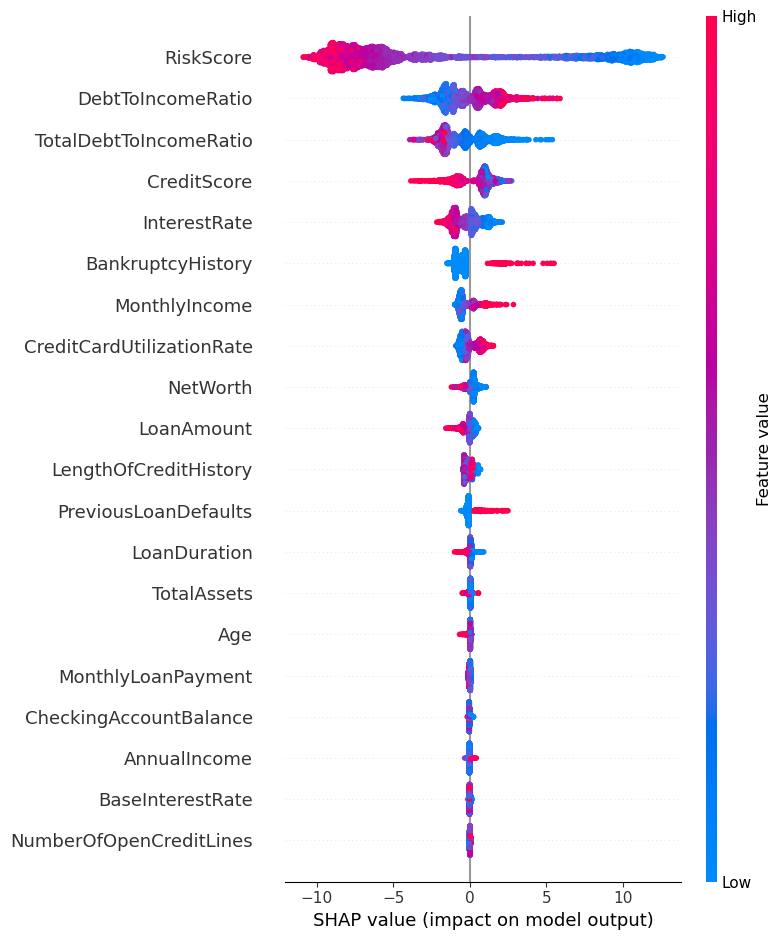

In [32]:
xgb_clf.fit(X_train, y_train)

explainer = shap.TreeExplainer(xgb_clf)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test)

  0%|          | 0/4000 [00:00<?, ?it/s]

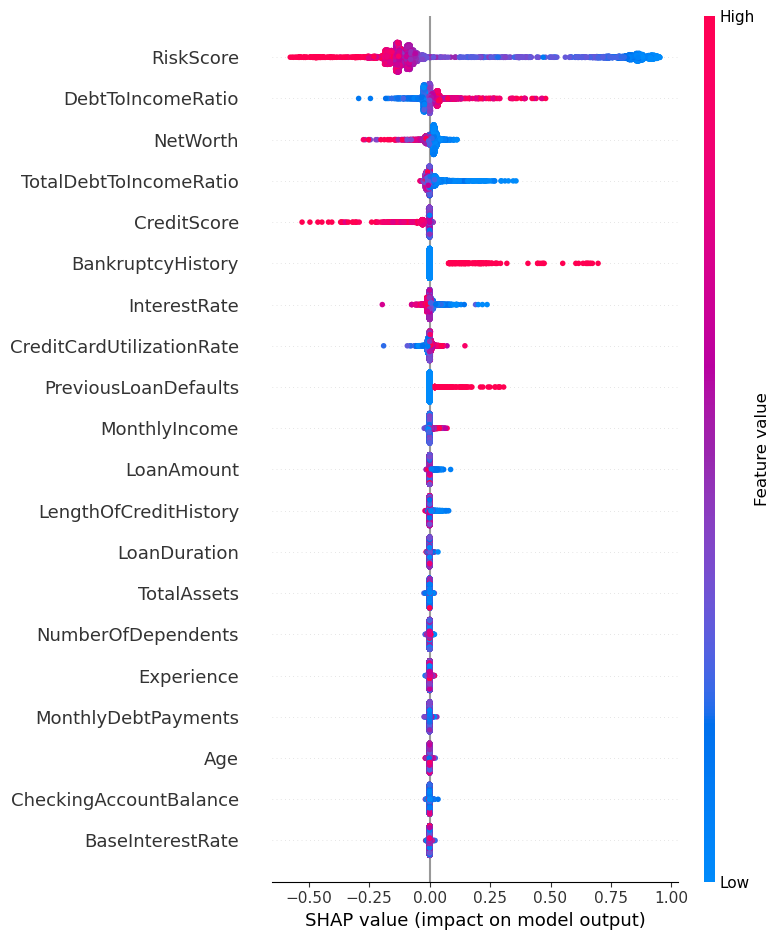

In [33]:
ab_clf.fit(X_train, y_train)

background = shap.kmeans(X_train, 10)
explainer = shap.KernelExplainer(ab_clf.predict, background)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test)

[LightGBM] [Info] Number of positive: 3763, number of negative: 12237
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003007 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4645
[LightGBM] [Info] Number of data points in the train set: 16000, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.235187 -> initscore=-1.179248
[LightGBM] [Info] Start training from score -1.179248


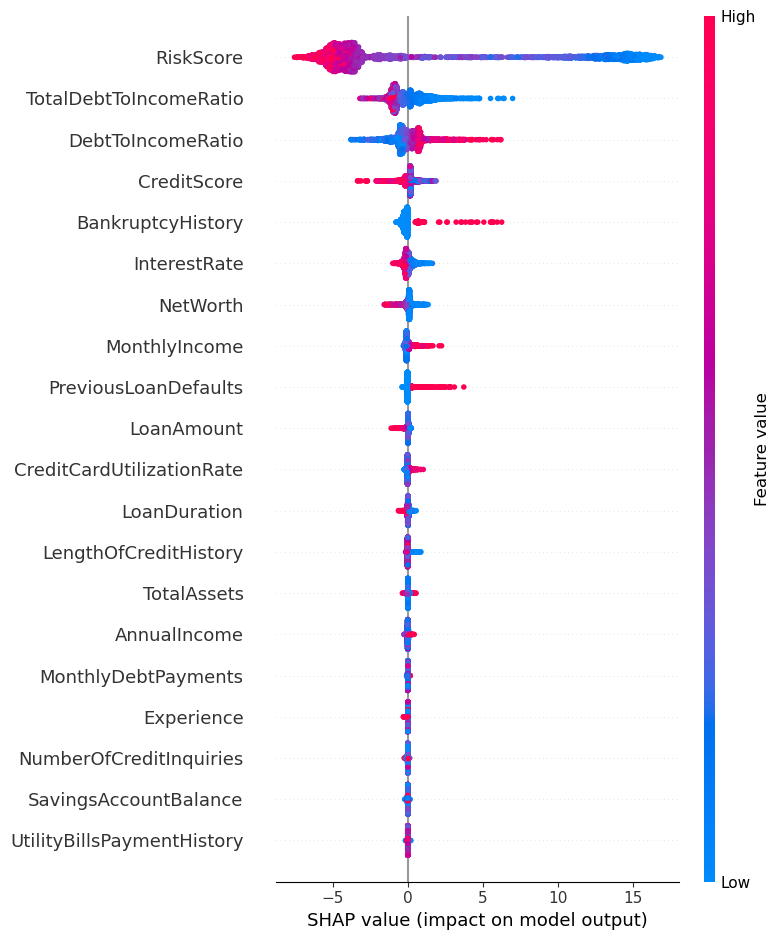

In [34]:
lgbm_clf.fit(X_train, y_train)

explainer = shap.TreeExplainer(lgbm_clf)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test)

  0%|          | 0/4000 [00:00<?, ?it/s]

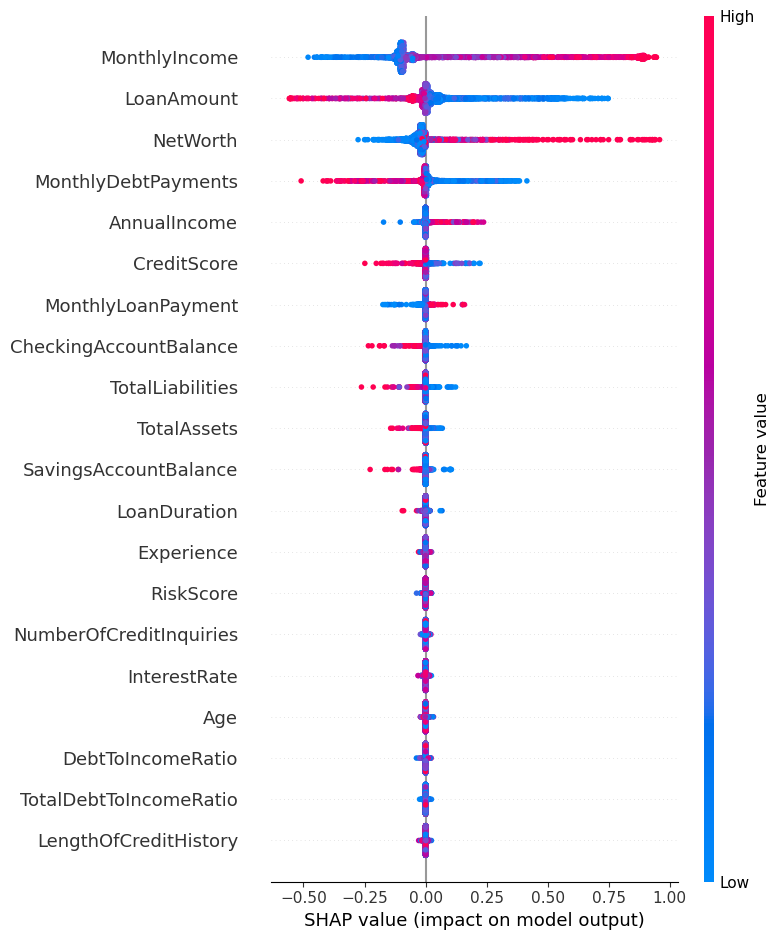

In [36]:
lr_clf.fit(X_train, y_train)

background = shap.kmeans(X_train, 10)
explainer = shap.KernelExplainer(lr_clf.predict, background)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test)

In [ ]:
svm_clf.fit(X_train, y_train)

background = shap.kmeans(X_train, 10)
explainer = shap.KernelExplainer(svm_clf.predict, background)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test)

In [ ]:
perceptron_clf.fit(X_train, y_train)

def wrapped_predict(X):
    return perceptron_clf.decision_function(X) if hasattr(perceptron_clf, 'decision_function') else perceptron_clf.predict(X)

background = shap.kmeans(X_train, 10)
explainer = shap.KernelExplainer(wrapped_predict, background)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test)